In [1]:
import numpy as np
import matplotlib.pyplot as plt        # 2D绘图库
# from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # 让图片更大一些

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
def load_data():
    path=r'D:\mnist.npz'# 放置mnist.npz的目录
    f=np.load(path)
    x_train,y_train=f['x_train'],f['y_train']
    x_test,y_test=f['x_test'],f['y_test']
    f.close()
    return (x_train,y_train),(x_test,y_test)

In [3]:
nb_classes = 10

# 加载本地的数据
(X_train, y_train), (X_test, y_test) = load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


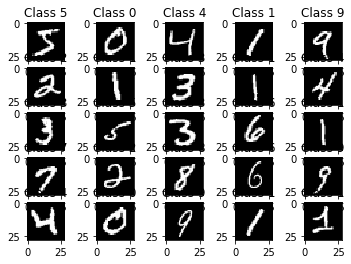

In [5]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i],cmap='gray',interpolation='none')# 热图（heatmap）是数据分析的常用方法，通过色差、亮度来展示数据的差异、易于理解。
    plt.title("Class {}".format(y_train[i]))

In [6]:
# 对于每个训练示例，我们的神经网络都将采用单个矢量，因此我们需要对输入进行整形，以使每个28x28图像成为单个784维矢量。 
# 我们还将缩放输入范围为[0-1]而不是[0-255]
X_train=X_train.reshape(60000,28*28)
X_test=X_test.reshape(10000,28*28)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=256# 值在0-255之间，归一化
X_test/=256
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [7]:
# 多类分类问题与二类分类问题类似，需要将类别变量（categorical function）的输出标签转化为数值变量。
# 这个问题在二分类的时候直接转换为（0，1）（输出层采用sigmoid函数）或（-1，1）（输出层采用tanh函数）。
# 类似的，在多分类问题中我们将转化为虚拟变量（dummy variable）：
# 即用one hot encoding方法将输出标签的向量（vector）转化为只在出现对应标签的那一列为1，其余为0的布尔矩阵。
# 这一步转化工作我们可以利用keras中的np_utils.to_categorical函数来进行。
Y_train=np_utils.to_categorical(y_train,nb_classes)
Y_test=np_utils.to_categorical(y_test,nb_classes)
print(Y_train.shape)
print(Y_test.shape)# 对比上面y_train,y_test原来的shape可以更好理解函数的作用

(60000, 10)
(10000, 10)


In [8]:
# 3层全连接神经网络 指定训练的尺寸
model=Sequential()
# keras中的主要数据结构是model（模型）
# Keras有两种不同的构建模型的方法：Sequential models Functional API 
model.add(Dense(512,input_shape=(784,)))# 全连接层 第一个参数表示每一批训练的图片数目 第二个参数表示图片尺寸
model.add(Activation('relu'))# 激活函数 非线性函数
model.add(Dropout(0.2))# 防止过度拟合
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))# 激活函数

In [9]:
# 编译
model.compile(loss='categorical_crossentropy',optimizer='adam')# 损失函数 loss：模型试图最小化的目标函数 优化器 optimizer:

In [10]:
# 训练
model.fit(X_train, Y_train,
         batch_size=128, epochs=4,
        verbose=1,
         validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 11s 186us/step - loss: 0.2510 - val_loss: 0.1086E
Epoch 2/4
60000/60000 [==============================] - 6s 98us/step - loss: 0.1009 - val_loss: 0.0821
Epoch 3/4
60000/60000 [==============================] - 6s 97us/step - loss: 0.0717 - val_loss: 0.0685
Epoch 4/4
60000/60000 [==============================] - 6s 100us/step - loss: 0.0554 - val_loss: 0.0726


In [11]:
# 在测试模式，返回误差值和评估标准值，计算逐批次进行。
score=model.evaluate(X_test, Y_test, verbose=0)
print('test score:', score)

test score: 0.07255346087627113


In [37]:
predicted_classes=model.predict_classes(X_test)
correct_indices=np.nonzero(predicted_classes==y_test)[0] # np.nonzerro返回数组a中非零元素的索引值数组。
incorrect_indices=np.nonzero(predicted_classes!=y_test)[0]
print(X_test.shape)
print(predicted_classes)
print(correct_indices)
print(incorrect_indices)

(10000, 784)
[7 2 1 ... 4 5 6]
[   0    1    2 ... 9997 9998 9999]
[  73  151  247  259  321  340  381  445  448  495  551  582  610  613
  619  625  659  674  691  720  844  924  938  947  951  965 1014 1039
 1114 1156 1182 1226 1232 1242 1247 1260 1319 1378 1393 1414 1500 1522
 1530 1549 1553 1609 1671 1678 1681 1709 1717 1737 1754 1790 1800 1850
 1880 1901 1992 2004 2016 2040 2043 2044 2053 2098 2109 2118 2129 2130
 2135 2189 2272 2293 2308 2369 2387 2406 2447 2462 2488 2582 2607 2648
 2654 2758 2877 2896 2921 2927 2939 2953 2995 3005 3030 3060 3073 3117
 3330 3422 3503 3520 3549 3558 3597 3681 3727 3751 3767 3801 3808 3811
 3817 3838 3853 3893 3941 3968 3985 4018 4027 4065 4075 4078 4093 4154
 4163 4176 4193 4224 4248 4289 4344 4369 4425 4497 4500 4536 4547 4601
 4635 4639 4723 4731 4761 4807 4814 4823 4860 4880 4886 4966 4978 5140
 5265 5331 5457 5600 5623 5642 5749 5877 5887 5955 5973 6011 6035 6166
 6511 6555 6558 6571 6576 6597 6625 6641 6651 6783 6847 7434 7928 8020
 8062 8171

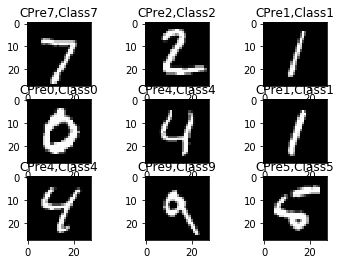

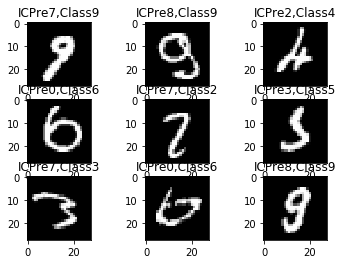

In [38]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("CPre{},Class{}".format(predicted_classes[correct], y_test[correct]))
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("ICPre{},Class{}".format(predicted_classes[incorrect], y_test[incorrect]))

In [39]:
# 尝试自己写数字进行测试
from PIL import Image

预测的结果是：[3]


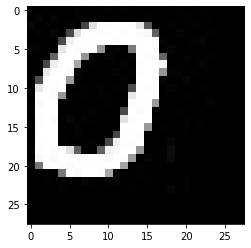

In [40]:
test=Image.open('D:/test.jpg').convert("L")
test=np.array(test)
test_reshape=np.reshape(test,(1,784))
predicted_class=model.predict_classes(test_reshape)
print("预测的结果是：{}".format(predicted_class))
plt.imshow(test,cmap='gray')

In [41]:
# 发现效果不怎么样hhh